In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical  # Used for converting the target values into a one-hot-encoding format.
from keras.datasets import mnist # This data is already divided into a train and test set
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
# We have 60000 images, each of size 28 x 28. The reason it does not have dimension (60000, 28, 28, 3) is because the images
# are grayscale, meaning that instead of having a red, green, blue value per pixel, each pixel has one value between 0 and 255 that represents
# the pixels intensity, 0 being black, and 255 being white.

(60000, 28, 28)

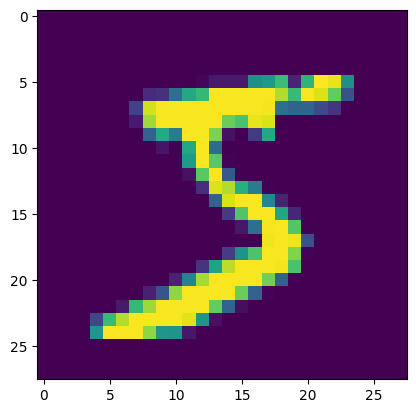

In [3]:
# Let's look at an example of an image
plt.imshow(X_train[0])

In [4]:
# For conventional NNs, we cannot input the image as is, so we have to each image into 1 dimensional vectors
X_train_flatten = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], -1).astype('float32')

X_train_flatten.shape
# Each of these values represent the pixel intensity in this one image.
# Each row represents an image.

(60000, 784)

In [5]:
# normalize data. (Since pixel intensity is between 0 and 255, dividing by 255 will rescale the pixel values to between 0 and 1)
X_train_flatten /= 255
X_test_flatten /= 255

# We also need to divide our y_train and y_test into categories.
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

y_train.shape # We can see now each target has 10 values, it will have a value of 1 in the class that datapoint takes, and 0 else where.

(60000,)

In [12]:
n_cols = X_train_flatten.shape[1]

# Define model architecture
def conventional_NN_model():
    # Define model and input layer
    model = Sequential()
    model.add(Input(shape=(n_cols,)))

    # Define hidden layers
    model.add(Dense((24*24), activation='relu'))
    model.add(Dense(100, activation='relu'))

    # Define output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Define optimization, loss, and evaluation metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Build model
conventional_NN_model = conventional_NN_model()

# Train model
conventional_NN_model.fit(X_train_flatten, y_train_cat, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9388 - loss: 0.2028 - val_accuracy: 0.9670 - val_loss: 0.1138
Epoch 2/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9733 - loss: 0.0838 - val_accuracy: 0.9717 - val_loss: 0.0901
Epoch 3/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.9787 - val_loss: 0.0802
Epoch 4/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9876 - loss: 0.0408 - val_accuracy: 0.9763 - val_loss: 0.0813
Epoch 5/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9884 - loss: 0.0333 - val_accuracy: 0.9800 - val_loss: 0.0721
Epoch 6/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9758 - val_loss: 0.1006
Epoch 7/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9740 - val_loss: 0.1161
Epoch 8/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.9815 - val_loss: 0.0830
Epoch 9/10
1688/1688 - 5s - 3ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9808 - 

In [14]:
# Scores return the loss first, then whatever you specified in the metrics parameter in the model.compile() function
# in the order you specified it. We only included accuracy, so our scores output will be an array of the loss and accuracy.
scores = conventional_NN_model.evaluate(X_test_flatten, y_test_cat, verbose=0)
print(f"loss: {scores[0]}, accuracy: {100 * scores[1]:.2f}%")

loss: 0.10754163563251495, accuracy: 97.70%


In [15]:
# Let's see how a CNN will perform.

# Reshape images to be a shape a CNN expects.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") # Convert to float for normalizing later and 32 bits for deeplearning framework efficiency.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")

# Normalize data
X_train_norm = X_train / 255
X_test_norm = X_test / 255

print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")

Shape of X_train: (60000, 28, 28, 1), Shape of X_test: (10000, 28, 28, 1)


In [19]:
# Extract input shape
input_shape = X_train[0].shape

# Extract number of classes.
num_classes = y_train_cat.shape[1]

# Define CNN architecture
def CNN(input_shape):
    # Define model and input layer.
    model = Sequential()
    model.add(Input(shape=input_shape))

    # Define the convolutional and pooling layers.
    model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Flatten the dimensions from the pooling layer into dimensions
    # the conventional dense layer can understand e.g., (min_batch_size, num_features)
    model.add(Flatten())

    # Define the conventional portion of the CNN
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # define the loss function to optimize, the optimizer to achieve the optimization, and the evaluation metric.
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [21]:
# Build model
CNN_model = CNN(input_shape)

# Train model
CNN_model.fit(X_train_norm, y_train_cat, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9551 - loss: 0.1518
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9837 - loss: 0.0538
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9882 - loss: 0.0365
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9913 - loss: 0.0267
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9936 - loss: 0.0192
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9973 - loss: 0.0086
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9971 - loss: 0.0089
Epoch 10/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9979 - loss: 0.0063


In [23]:
# Evaluate the CNN model with one convolutional and pooling layer
scores = CNN_model.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Loss: {scores[0]}, Accuracy: {100 * scores[1]:.2f}%")

Loss: 0.043527811765670776, Accuracy: 98.85%


In [33]:
# Let's instead define a CNN with 2 convolutional and pooling and layers.
def convolutional_network(input_shape):
    # Define model and input layer
    model = Sequential()
    model.add(Input(shape=input_shape))

    # Define first convolutional and pooling layer.
    model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Define second convolutional and pooling layer
    model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    # Flatten the dimensions from the pooling layer
    model.add(Flatten())

    # Define the conventional portion of the CNN
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Define the optimizer, loss function, and evaluation metrics
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

In [36]:
# Build and train model
convolutional_network_model = convolutional_network(input_shape)
convolutional_network_model.fit(X_train_norm, y_train_cat, batch_size=32, epochs=10, verbose=2, validation_split=0.2)

Epoch 1/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9478 - loss: 0.1711 - val_accuracy: 0.9809 - val_loss: 0.0650
Epoch 2/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9826 - loss: 0.0532 - val_accuracy: 0.9860 - val_loss: 0.0485
Epoch 3/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9862 - val_loss: 0.0458
Epoch 4/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9877 - val_loss: 0.0429
Epoch 5/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 6/10
1500/1500 - 5s - 4ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9896 - val_loss: 0.0395
Epoch 7/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9951 - loss: 0.0149 - val_accuracy: 0.9894 - val_loss: 0.0354
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9906 - val_loss: 0.0376
Epoch 9/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9965 - loss: 0.0099 - val_accuracy: 0.9883 - 

In [37]:
# Evaluate the CNN model with two convolutional and pooling layers
scores = convolutional_network_model.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Loss: {scores[0]:.5f}, Accuracy: {100 * scores[1]:.2f}%")

Loss: 0.03896, Accuracy: 99.02%


In [40]:
# Training can take a really long time, and can be computationally expensive, so we can save our models.
conventional_NN_model.save("conventional_NN_model_MNIST.keras")
CNN_model.save("CNN_model_MNIST.keras")
convolutional_network_model.save("Convolutional_network_model_MNIST.keras")

In [41]:
# Then, when we are ready to use the model, we can load it.
conventional_NN_model = keras.models.load_model("conventional_NN_model_MNIST.keras")
CNN_model = keras.models.load_model("CNN_model_MNIST.keras")
convolutional_network_model = keras.models.load_model("Convolutional_network_model_MNIST.keras")

In [42]:
# In this notebook I learned how to use the Keras library to build a conventional NN and a CNN architecture for classification problems using
# the keras library, how to perform basic evaluation of a conventional NN and a CNNs performance, and how and why we must one-hot-encode target
# class values. I also learned how to save and load a model using Keras.